In [17]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random as rd
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from openpyxl import load_workbook 

In [18]:
from openpyxl import load_workbook

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
pip install openpyxl --upgrade --pre

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.0 kB 435.7 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.0 kB 655.4 kB/s eta 0:00:01
   ---------------------------------------  245.8/250.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  245.8/250.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  245.8/250.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  245.8/250.0 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- 250.0/250.0 kB 730.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
EWA = pd.read_excel(r"C:\Users\saisr\Desktop\DATA SCIENCE\ASSIGNMENTS\EastWestAirlines.xlsx", sheet_name='data')
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [25]:
EWA1=EWA.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)

In [27]:
EWA.set_index('ID',inplace=True)

In [28]:
EWA

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [29]:
EWA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [31]:
EWA.duplicated().sum()

1

In [33]:
EWA[EWA.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [37]:
EWA.drop([3899])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [38]:
EWA.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [39]:
EWA.nunique()

Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award                   2
dtype: int64

## KMeans

In [41]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled = scalar.fit_transform(EWA)
pd.DataFrame(scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3999.000000,3.999000e+03,3.999000e+03,3.999000e+03
mean,2.842882e-17,6.574164e-17,1.705729e-16,3.038330e-16,1.350369e-16,-2.842882e-17,-7.817925e-17,0.000000,1.776801e-17,5.685763e-17,1.421441e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.304396e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-7.099918e-01,-1.208203e+00,-0.328603,-3.621679e-01,-1.993611e+00,-7.669193e-01
25%,-5.465676e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-6.582276e-01,-8.957878e-01,-0.328603,-3.621679e-01,-8.661823e-01,-7.669193e-01
50%,-3.027332e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-4.130308e-01,4.145743e-02,-0.328603,-3.621679e-01,-1.092530e-02,-7.669193e-01
75%,1.866028e-01,-1.862987e-01,6.831212e-01,-9.824189e-02,-6.276658e-02,2.756198e-01,5.621492e-01,-0.106466,-9.850333e-02,8.097050e-01,1.303918e+00
max,1.618884e+01,1.422486e+01,2.135821e+00,1.344898e+01,2.042732e+01,1.020957e+01,7.747696e+00,21.683004,1.361205e+01,2.023095e+00,1.303918e+00


In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='random',n_init='auto')
kmeans.fit(scaled)

  File "C:\Users\saisr\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\data\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\data\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\data\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KMeans(init='random', n_clusters=2, n_init='auto')

In [43]:
kmeans.inertia_

35409.516629861304

<function matplotlib.pyplot.show(close=None, block=None)>

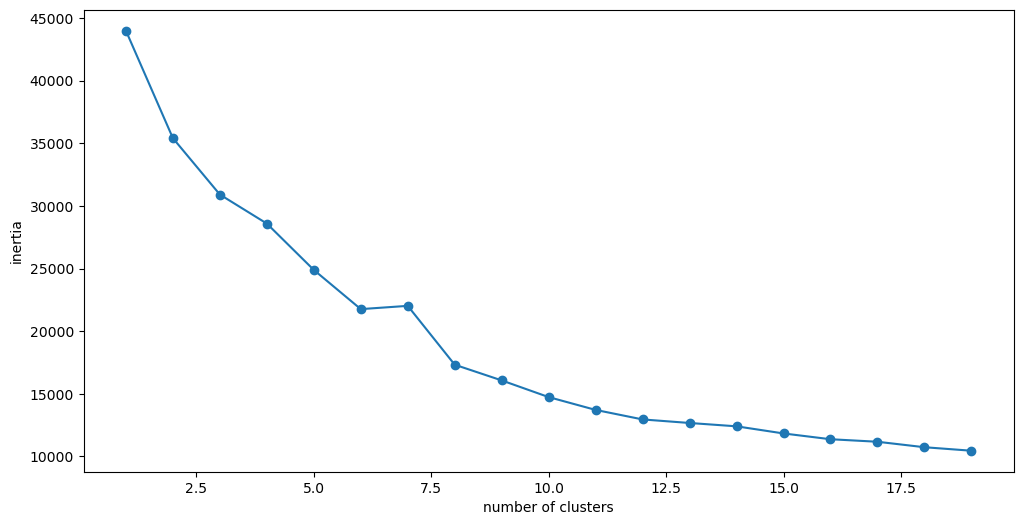

In [48]:
SSE=[]
for cluster in range(1,20):
    kmeans=KMeans(n_clusters = cluster ,init='random',n_init='auto')
    kmeans.fit(scaled)
    SSE.append(kmeans.inertia_)
    
df = pd.DataFrame({'cluster':range(1,20),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['cluster'],df['SSE'],marker='o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show


In [56]:
Kmeans = KMeans(n_clusters = 6, init='random',n_init = 'auto')
Kmeans.fit(scaled)
pred = kmeans.predict(scaled)

In [57]:
frame = pd.DataFrame(scaled)
frame['cluster'] = pred
print(frame['cluster'].value_counts())
print(pd.DataFrame(frame[frame['cluster'] == 3]))

cluster
4    1463
3    1224
5    1102
0     152
1      43
2      15
Name: count, dtype: int64
             0         1         2         3         4         5         6  \
0    -0.451141 -0.186299 -0.769578 -0.098242 -0.062767 -0.702786 -1.104065   
1    -0.539457 -0.186299 -0.769578 -0.098242 -0.062767 -0.701088 -0.999926   
2    -0.320031 -0.186299 -0.769578 -0.098242 -0.062767 -0.539253 -0.791649   
3    -0.583799 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
5    -0.567483 -0.186299 -0.769578 -0.098242 -0.062767 -0.709992 -1.208203   
...        ...       ...       ...       ...       ...       ...       ...   
2996 -0.730440 -0.186299 -0.769578 -0.098242 -0.062767 -0.482602  0.666288   
3754  1.468213 -0.186299 -0.769578 -0.098242 -0.062767 -0.283455 -0.687511   
3755  0.043435 -0.186299 -0.769578 -0.098242 -0.062767 -0.653134 -0.166819   
3760 -0.537085 -0.186299 -0.769578 -0.098242 -0.062767 -0.533455  0.666288   
3782 -0.650956 -0.186299 -0.769578 -0.098242 -0.

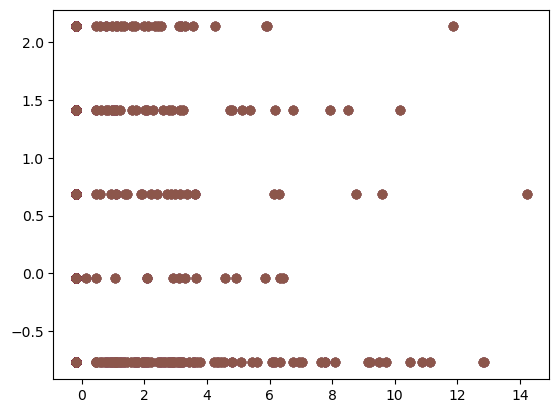

In [58]:
for k in range(6):
    data=frame[frame['cluster']==k+1]
    plt.scatter(frame[1],frame[2])
plt.show()

In [61]:
Kmeans.labels_

array([0, 0, 0, ..., 1, 3, 3])

In [62]:
EWA['clusters']=Kmeans.labels_
EWA

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [63]:
EWA.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,59627.547931,70.660949,1.494450,1.004036,1.001009,6261.080727,8.461150,176.737639,0.534813,5624.449041,0.000000
1,1,58161.610390,191.600945,1.676505,1.047226,1.000000,10822.003542,10.822904,420.354191,1.301063,4246.020071,0.985832
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,34604.089438,93.963373,1.249574,1.007666,1.000000,4437.236797,6.657581,145.675468,0.434412,2086.056218,0.000000
4,4,138401.877844,145.005988,4.196407,1.001198,1.002395,50122.924551,19.944910,387.221557,1.178443,4953.167665,0.628743
5,5,202308.284672,813.343066,2.277372,1.029197,1.000000,34455.445255,28.854015,5887.759124,17.102190,4713.708029,0.824818


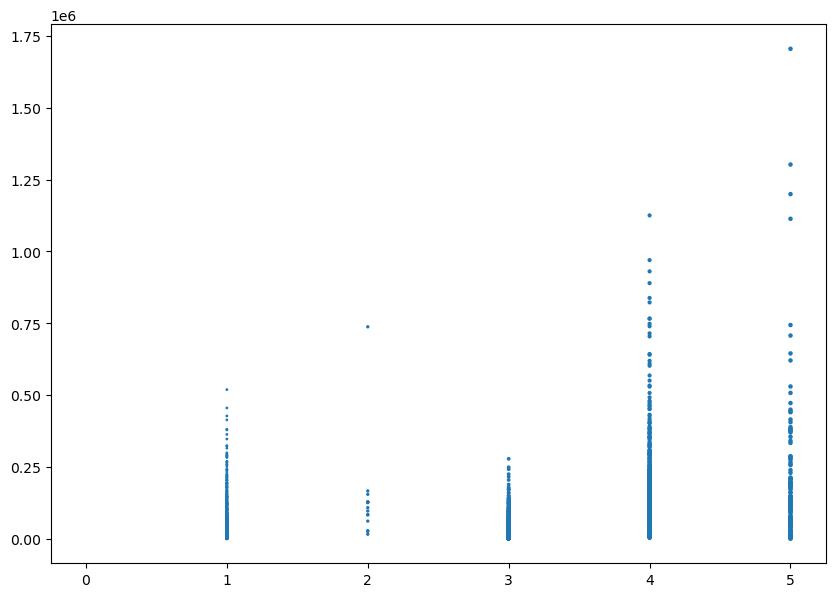

In [67]:
plt.figure(figsize=(10, 7))  
plt.scatter(EWA['clusters'],EWA['Balance'], Kmeans.labels_) 

## DBscan

In [79]:
from sklearn.cluster import DBSCAN
import seaborn as sns


In [80]:
EWA1=EWA.copy()

In [81]:
EWA1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
4018,64385,0,1,1,1,981,5,0,0,1395,1,2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,2


In [82]:
EWA1.values

array([[28143,     0,     1, ...,  7000,     0,     0],
       [19244,     0,     1, ...,  6968,     0,     0],
       [41354,     0,     1, ...,  7034,     0,     0],
       ...,
       [73597,     0,     3, ...,  1402,     1,     2],
       [54899,     0,     1, ...,  1401,     0,     3],
       [ 3016,     0,     1, ...,  1398,     0,     3]], dtype=int64)

<Axes: >

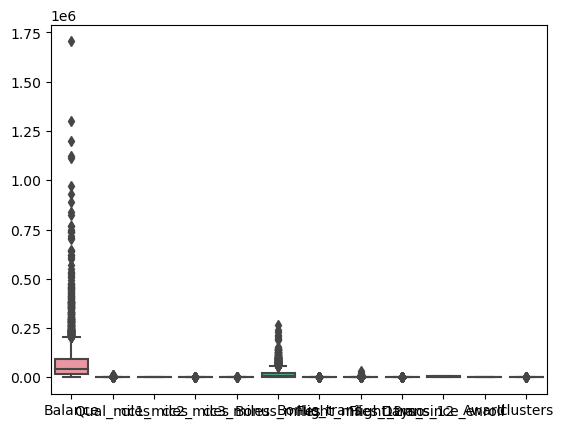

In [83]:
sns.boxplot(EWA1,orient='v')

In [84]:
EWA1_norm = StandardScaler().fit_transform(EWA1)
EWA1_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -8.68512616e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -8.68512616e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -8.68512616e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  3.48226551e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  9.56596134e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  9.56596134e-01]])

In [85]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(EWA1_norm)

DBSCAN(eps=1, min_samples=4)

In [76]:
dbscan.labels_

array([0, 0, 0, ..., 2, 3, 3], dtype=int64)

In [86]:
EWA1['clusters']=dbscan.labels_
EWA1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [87]:
EWA1.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,183901.249084,946.690476,2.758242,1.056777,1.089744,40327.998168,22.635531,2225.100733,6.412088,4726.749084,0.703297
1,0,57892.712487,7.892970,1.500525,1.000000,1.000000,6209.676810,8.412382,137.082896,0.435467,5621.967471,0.000000
2,1,61038.832721,9.875919,2.591912,1.000000,1.000000,22988.970588,12.785846,287.573529,0.909926,4515.324449,1.000000
3,2,51197.803650,3.167153,1.771533,1.000000,1.000000,11068.869343,8.516058,118.089051,0.378832,2544.905109,0.000000
4,3,47328.500000,0.000000,1.000000,2.000000,1.000000,8249.500000,11.750000,0.000000,0.000000,5323.750000,0.000000
5,4,36413.428571,0.000000,1.000000,3.000000,1.000000,14341.142857,13.857143,57.142857,0.285714,3537.285714,0.000000
6,5,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
7,6,164883.400000,1471.600000,1.000000,1.000000,1.000000,8472.800000,5.000000,300.000000,1.400000,4173.400000,1.000000
8,7,29241.222222,0.000000,1.000000,2.000000,1.000000,8452.111111,12.111111,27.777778,0.222222,2236.111111,0.000000


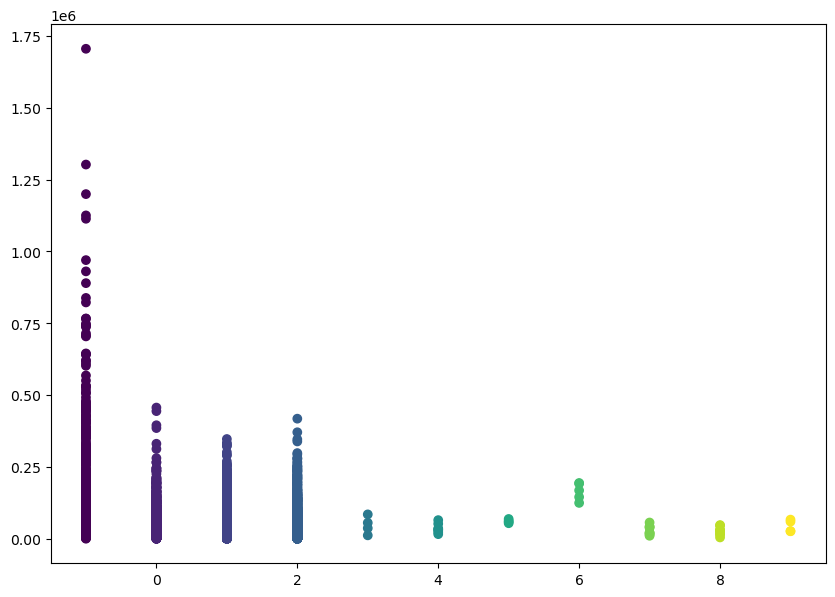

In [90]:
plt.figure(figsize=(10, 7))  
plt.scatter(EWA1['clusters'],EWA1['Balance'], c=dbscan.labels_)

## Hierarchical

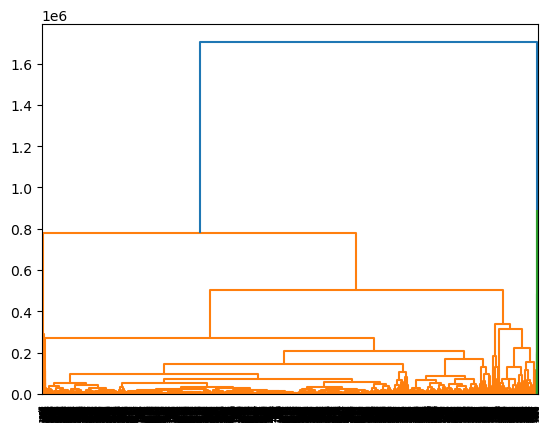

In [92]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram=sch.dendrogram(sch.linkage(EWA,method='complete'))

In [93]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [94]:
y_hc=hc.fit_predict(EWA)

In [95]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
hc.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
EWA['h_clusterid']=hc.labels_

In [98]:
EWA

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,h_clusterid
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,2,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,0
